# Taller Monopoly

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import Image

## Punto 1

¡Hugo, Paco y Luis necesitan tu ayuda! Los pobres muchachos requieren encontrar un tesoro, espero que tú (Tío Rico) seas capaz de llevarlos a su primer millón. Hay 4 formas con las que vas a llegar al tesoro:
<br>
<ul>
    <li>Escala la imagen a 1080x720</li>
    <li>Realiza una reflexión horizontal con una imagen escalada a 1280x800</li>
    <li>Realiza una inclinación en <i>Y</i> de 0.3</li>
    <li>Mueve la imagen en <i>X</i> en un 20%, en <i>Y</i> al 30%. En caso tal de que haya espacios negros (vacíos), deberás de rellenarlos con el promedio de la escala de grises de la imagen (Si desea hacerlo, puede usar una distribución normal para rellenar el espacio negro)</li>
</ul>

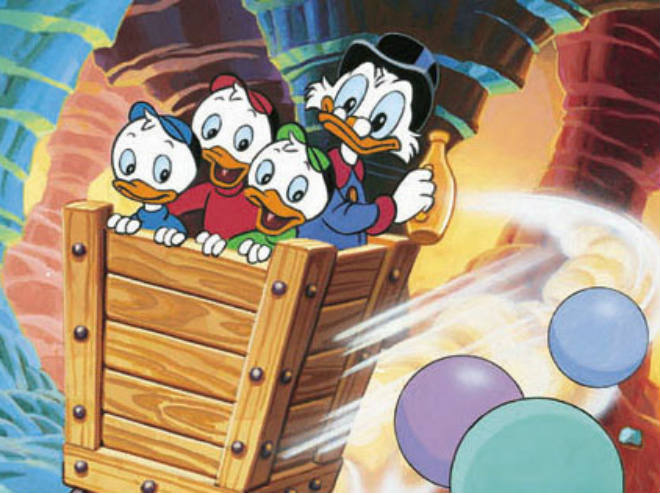

In [2]:
Image("res/primero/primero.jpg")

Las dimensiones de la imagen original son: (x,y) = (495, 660)
Las dimensiones de la imagen re-escalada son: (x,y) = (720, 1080)


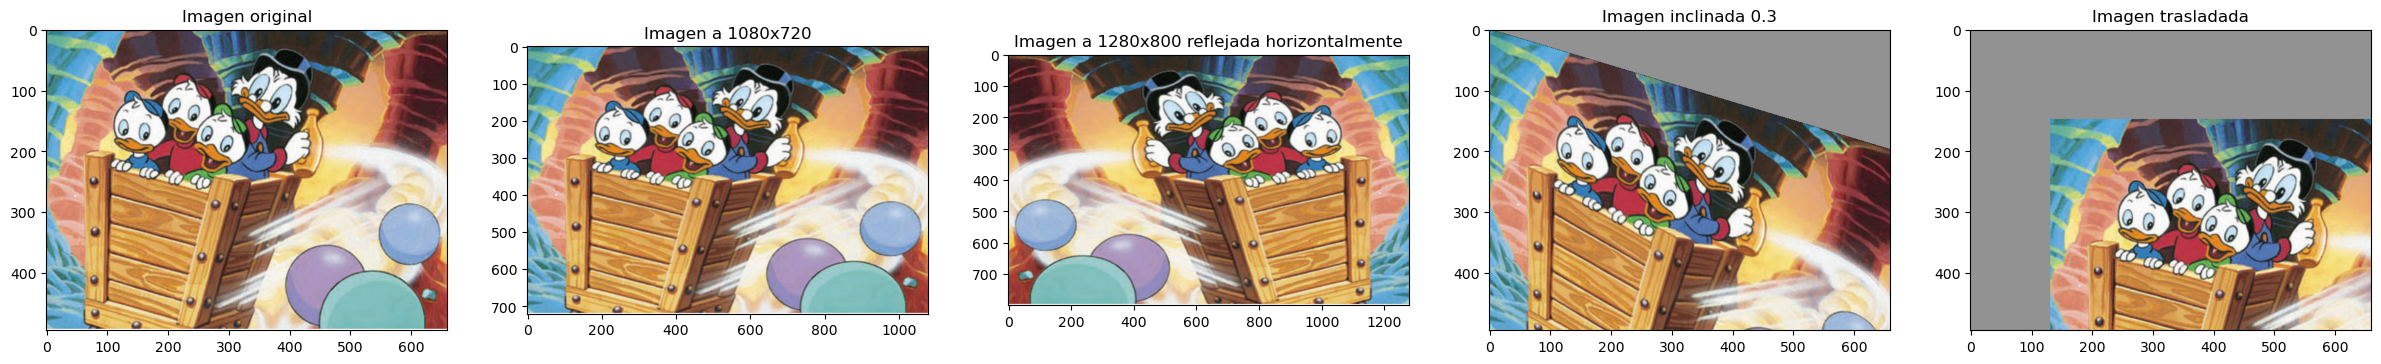

In [3]:
# Leemos la imagen original
img_duck = cv2.cvtColor(cv2.imread('res/primero/primero.jpg'), cv2.COLOR_BGR2RGB)

""" Realizamos el re-escalamiento de la imagen original a un tamaño de 1080x720 """
x1, y1 = 1080, 720
img_duck_resized = cv2.resize(img_duck, (x1, y1))
print(f'Las dimensiones de la imagen original son: (x,y) = {img_duck.shape[:2]}')
print(f'Las dimensiones de la imagen re-escalada son: (x,y) = {img_duck_resized.shape[:2]}')
#plt.imshow(img_duck_resized);


""" Reflexión horizontal con imagen re-escalada a 1280x800 """
# Re-escalado de la imagen original
x2, y2 = 1280, 800
img_duck_resized2 = cv2.resize(img_duck, (x2, y2))

# Construcción de la matriz afin de transformación
matrix_reflection = np.float32([[-1, 0, x2], [0, 1, 0]])

# El orden en la función debe ser cols(x), rows(y). El método '.shape' devuelve (rows, cols)
rows, cols = img_duck_resized2.shape[:2]
img_duck_reflection = cv2.warpAffine(img_duck_resized2, matrix_reflection, (cols, rows))
#plt.imshow(img_duck_reflection);


""" Inclinación en Y de 0.3 """
# Matriz afin de transformación
inc_y = 0.3
matrix_tilt = np.float32([[1, 0, 0], [inc_y, 1, 0]])

# Aplicar la transformación
rows, cols = img_duck.shape[:2]
img_duck_tilted = cv2.warpAffine(img_duck, matrix_tilt, (cols, rows))

# Rellenar los espacios negros con el valor promedio de la imagen en escala de grises
mean_grayscale = np.mean(cv2.cvtColor(img_duck, cv2.COLOR_RGB2GRAY))
img_duck_tilted[img_duck_tilted == 0] = mean_grayscale
#plt.imshow(img_duck_tilted);


""" Traslaciones de 20% en X y 30% en Y"""

# Matriz afin de transformación
tx = math.floor(0.2*img_duck.shape[1])
ty = math.floor(0.3*img_duck.shape[0])
matrix_translation = np.float32([[1, 0, tx], [0, 1, ty]])
# Aplicar la transformación
rows, cols = img_duck.shape[:2]
img_duck_translation = cv2.warpAffine(img_duck, matrix_translation, (cols, rows))

# Rellenar los espacios negros con el valor promedio de la imagen en escala de grises
img_duck_translation[img_duck_translation == 0] = mean_grayscale
#plt.imshow(img_duck_translation);


# Generamos finalmente los gŕaficos
fig, axes = plt.subplots(1,5, figsize = (30,30))
axes[0].imshow(img_duck)
axes[0].set_title("Imagen original")

axes[1].imshow(img_duck_resized)
axes[1].set_title("Imagen a 1080x720")

axes[2].imshow(img_duck_reflection)
axes[2].set_title("Imagen a 1280x800 reflejada horizontalmente")

axes[3].imshow(img_duck_tilted)
axes[3].set_title("Imagen inclinada 0.3")

axes[4].imshow(img_duck_translation)
axes[4].set_title("Imagen trasladada");

## Punto 2

En este punto, usted deberá de realizar una función de ruido que sea de pimienta y granular (mínimo el 20% de la imagen debe de tener ruido, esto se debe hacer en RGB)

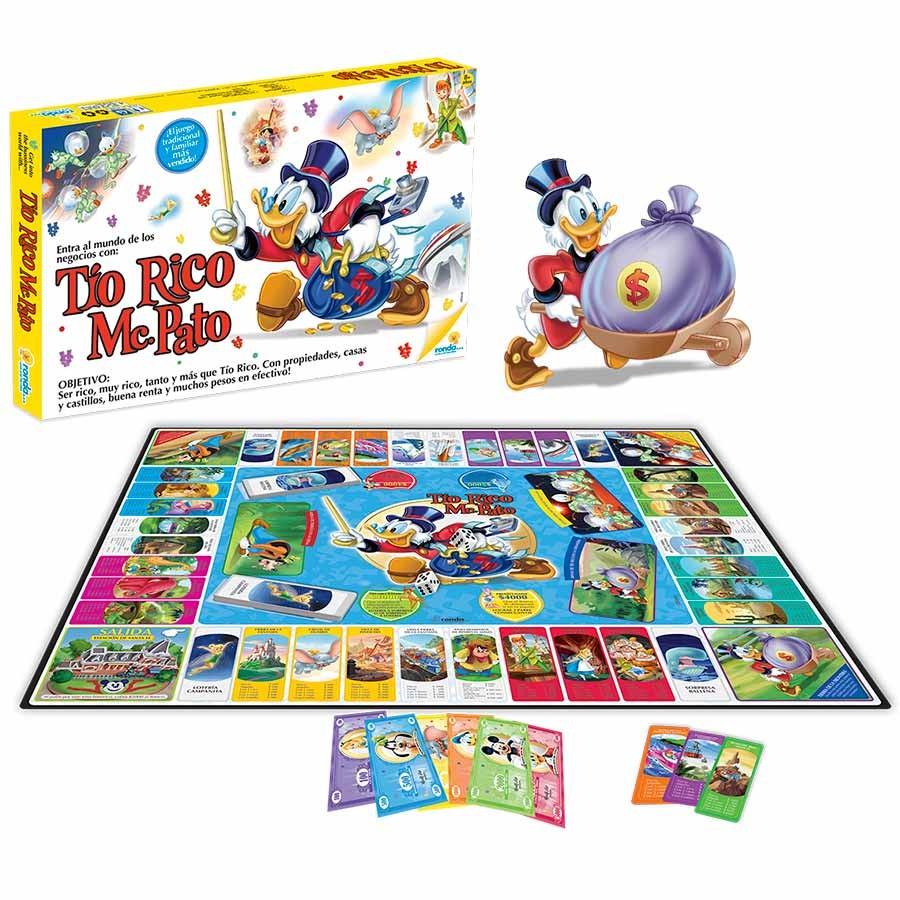

In [4]:
Image("res/segundo/segundo.jpg")

In [5]:
# Definición de la función generadora de ruido pimienta
def pimient_and_speckle_noise(img, amount = 0.1, dist_width = 0.25):
    new_img = img.copy()
    black = np.array([0, 0, 0], dtype='uint8')
    # Hacemos una matriz de probabilidades para cada coordenada X,Y de la imagen
    probs = np.random.random(img.shape[:2])
    
    # Aquellos puntos que correspondan con probabilidades cubiertas por 'amount', se hacen negros
    new_img[probs < amount] = black

    # Ahora para el ruido granular (speckle)
    # Obtener los valores de row, col, ch de la imagen de entrada
    row = img.shape[0]
    col = img.shape[1]
    ch =  img.shape[2] if len(img.shape) == 3 else 1

    # Modelar el ruido granular como una distribución uniforme
    uni_noise = np.random.uniform(-dist_width,dist_width,(row,col,ch)) if ch > 1 else np.random.uniform(-dist_width,dist_width,(row,col))
    # Obtener la imagen ruidosa y ajustarla con datos entre 0 y 255
    new_img = new_img + (new_img * uni_noise)
    new_img[new_img < 0] = 0
    new_img[new_img > 255] = 255
    return new_img.astype(np.uint8)

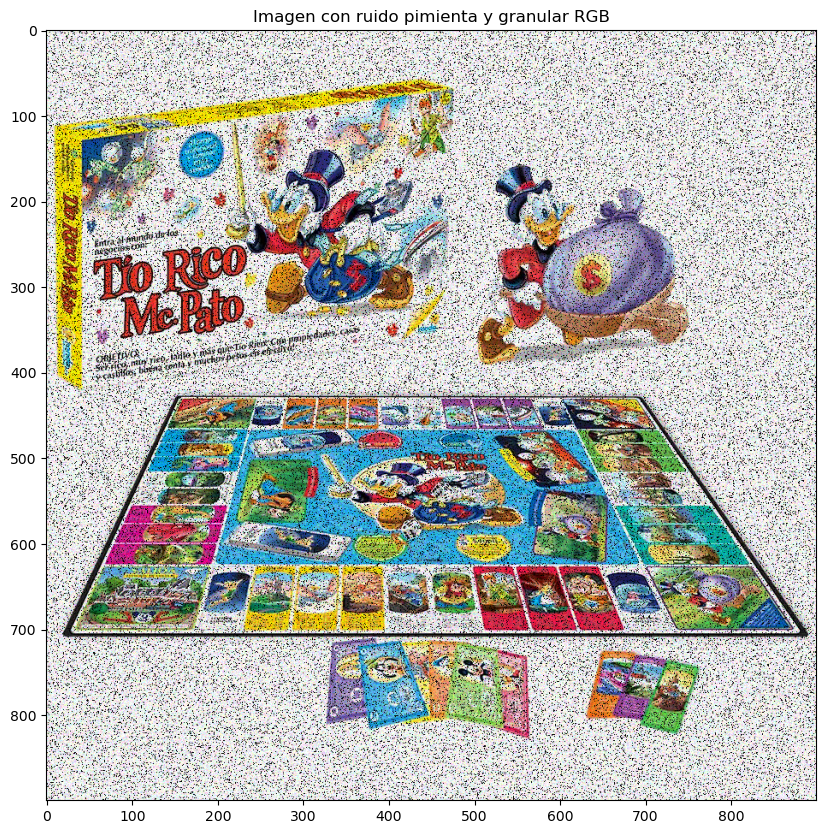

In [6]:
# Cargamos la imagen
img_monopoly = cv2.cvtColor(cv2.imread("res/segundo/segundo.jpg"), cv2.COLOR_BGR2RGB)
img_monopoly_noisy = pimient_and_speckle_noise(img_monopoly, 0.1, 0.25)
plt.figure(figsize=(10,10))
plt.imshow(img_monopoly_noisy)
plt.title('Imagen con ruido pimienta y granular RGB');

## Punto 3

Agarre la imagen resultado del punto anterior y realice un filtro tal que se puedan eliminar algunas imperfecciones de la imagen (No tiene que quedar perfecto, la idea es que entienda las utilidades de cada filtrado)

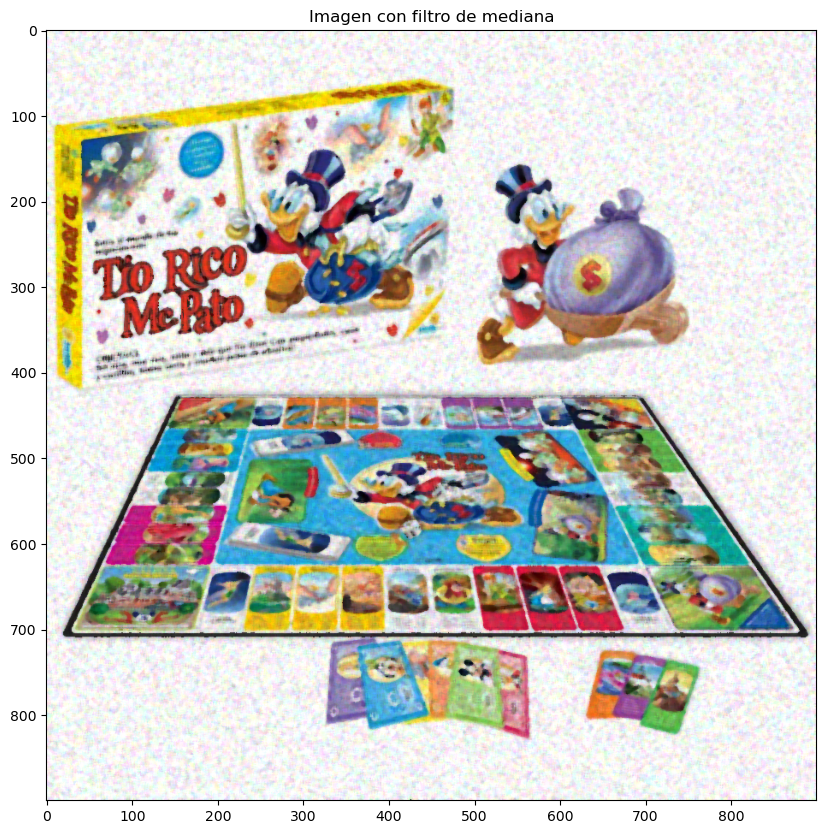

In [7]:
kernel_size = 5
img_filtered = cv2.medianBlur(img_monopoly_noisy, kernel_size)
plt.figure(figsize=(10,10))
plt.imshow(img_filtered);
plt.title('Imagen con filtro de mediana');